In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df_car.columns = columns_names

In [18]:
df_car

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


**EXPLORACIÓN**

In [19]:
df_car.shape

(1728, 7)

In [20]:
df_car.dtypes

price       object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
Class       object
dtype: object

In [21]:
# Nuestra variable target será CLASS 
df_car['Class'].value_counts()

Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [22]:
df_car.notnull().apply(pd.Series.value_counts)

,price,maint,doors,persons,lug_boot,safety,Class
True,1728,1728,1728,1728,1728,1728,1728


In [23]:
df_car.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

**PROCESAMIENTO**

In [24]:
X = df_car.drop(['Class'], axis=1)
y = df_car['Class']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [26]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [27]:
X_train.head()

,price,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


**ENTRENAMIENTO DE MODELO DE CLASIFICACIÓN CON ÁRBOL DE DECISIÓN**

In [28]:
#Todos nuestros tipos de datos son object, realizamos una transformación
import category_encoders as ce

In [30]:
encoder = ce.OrdinalEncoder(cols=['price','maint','doors','persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [31]:
X_train.head()

,price,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [32]:
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0) #Se definió una profundidad de 2 por los pocos datos que se poseen (1000)
# A partir de 5000 datos se podría variar a 3. 
# random_state es fijar una semilla (evitaando la variación)

In [33]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [34]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

**EVALUACIÓN DEL MODELO DE CLASIFICACIÓN CON ÁRBOL DE DECISIÓN**

In [35]:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Accuracy Train: ', train_accuracy_tree)
print('Accuracy Test: ', test_accuracy_tree)

Accuracy Train:  0.7733664185277088
Accuracy Test:  0.7591522157996147


Se comporta de manera favorable el modelo, sin embargo todavía hace falta optimizar para alcanzar el 80%

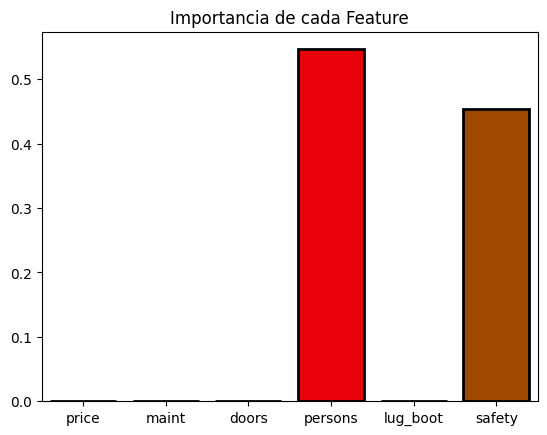

In [36]:
#verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)


sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

In [38]:
from sklearn.metrics import f1_score

train_accuracy_tree_f1 = f1_score(y_train, y_train_pred_tree, average='micro')
test_accuracy_tree_f1 = f1_score(y_test, y_test_pred_tree, average='micro')

print('Accuracy Train: ', train_accuracy_tree_f1)
print('Accuracy Test: ', test_accuracy_tree_f1)

Accuracy Train:  0.7733664185277088
Accuracy Test:  0.7591522157996146


In [40]:
X_train = X_train.drop(['price', 'maint', 'doors', 'lug_boot'], axis=1)
X_test = X_test.drop(['price', 'maint', 'doors', 'lug_boot'], axis=1)

In [41]:
X_train.head()

,persons,safety
1178,1,1
585,2,2
1552,1,3
1169,3,1
1033,3,3


In [42]:
#Entrenamiento2
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [43]:
# Caso para el que se redujeron las características (features)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Accuracy Train: ', train_accuracy_tree)
print('Accuracy Test: ', test_accuracy_tree)

Accuracy Train:  0.7733664185277088
Accuracy Test:  0.7591522157996147


**ENTRENANDO EL MODELO CON RANDOM FOREST**

In [47]:
X_train.shape

(1209, 2)

In [48]:
X_test.shape

(519, 2)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [50]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

**EVALUACIÓN DE LOS RESULTADOS**

In [51]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print('Accuracy Train: ', train_accuracy_rf)
print('Accuracy Test: ', test_accuracy_rf)

Accuracy Train:  0.771712158808933
Accuracy Test:  0.791907514450867


In [52]:
features_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

safety     0.53305
persons    0.46695
dtype: float64

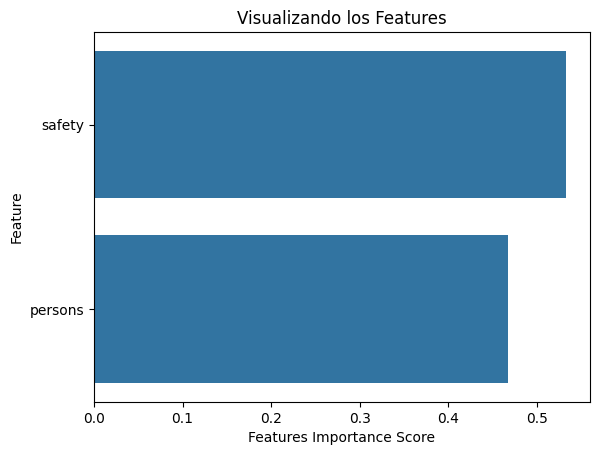

In [53]:
import seaborn as sns

sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title('Visualizando los Features')
plt.show()

In [54]:
# Creación de la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
print('Matriz de Confusion', cm)

Matriz de Confusion [[118   0   0   0]
 [ 19   0   0   0]
 [ 65   0 293   0]
 [ 24   0   0   0]]


In [55]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.52      1.00      0.69       118
        good       0.00      0.00      0.00        19
       unacc       1.00      0.82      0.90       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.79       519
   macro avg       0.38      0.45      0.40       519
weighted avg       0.81      0.79      0.78       519



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469